--------------------------------------------------------------------------------
		Verification des Données  
--------------------------------------------------------------------------------
(303, 23)
        age  sex  trestbps  ...  thal_4.73421926910299  thal_6.0  thal_7.0
0  0.948726  1.0  0.757525  ...                  False      True     False
1  1.392002  1.0  1.611220  ...                  False     False     False
2  1.392002  1.0 -0.665300  ...                  False     False      True
3 -1.932564  1.0 -0.096170  ...                  False     False     False
4 -1.489288  0.0 -0.096170  ...                  False     False     False

[5 rows x 23 columns]
--------------------------------------------------------------------------------
		Random Forest Feature Importance
--------------------------------------------------------------------------------
                  Feature  Importance
5                 thalach    0.127460
7                 oldpeak    0.117392
21             

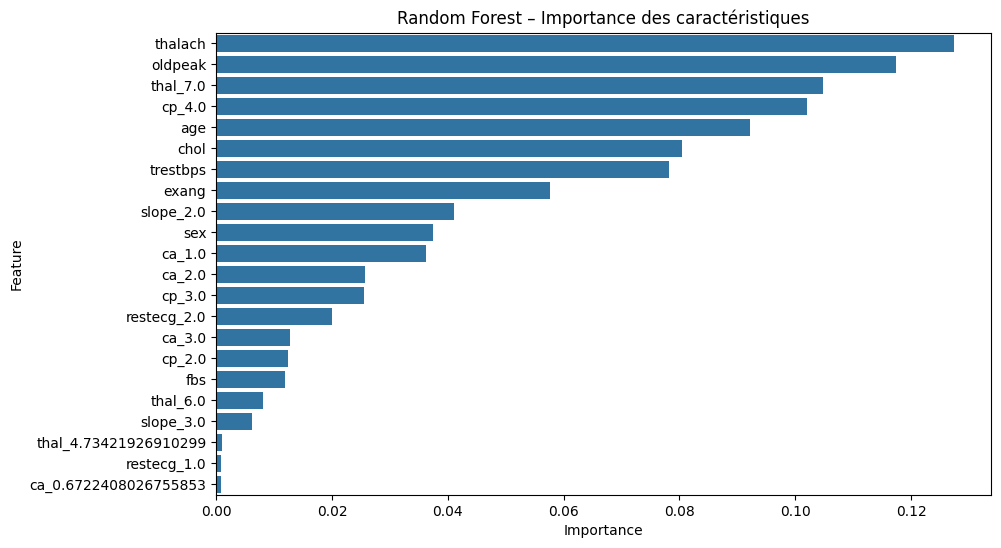



--------------------------------------------------------------------------------
		XGBoost Feature Importance
--------------------------------------------------------------------------------
                  Feature  Importance
10                 cp_4.0    0.249933
18                 ca_3.0    0.113749
21               thal_7.0    0.083726
20               thal_6.0    0.082193
4                     fbs    0.055728
13              slope_2.0    0.054981
17                 ca_2.0    0.053781
6                   exang    0.051326
16                 ca_1.0    0.049593
1                     sex    0.048159
7                 oldpeak    0.030386
0                     age    0.026340
5                 thalach    0.024966
2                trestbps    0.018586
9                  cp_3.0    0.015280
8                  cp_2.0    0.015120
3                    chol    0.014896
12            restecg_2.0    0.011256
11            restecg_1.0    0.000000
15  ca_0.6722408026755853    0.000000
14       

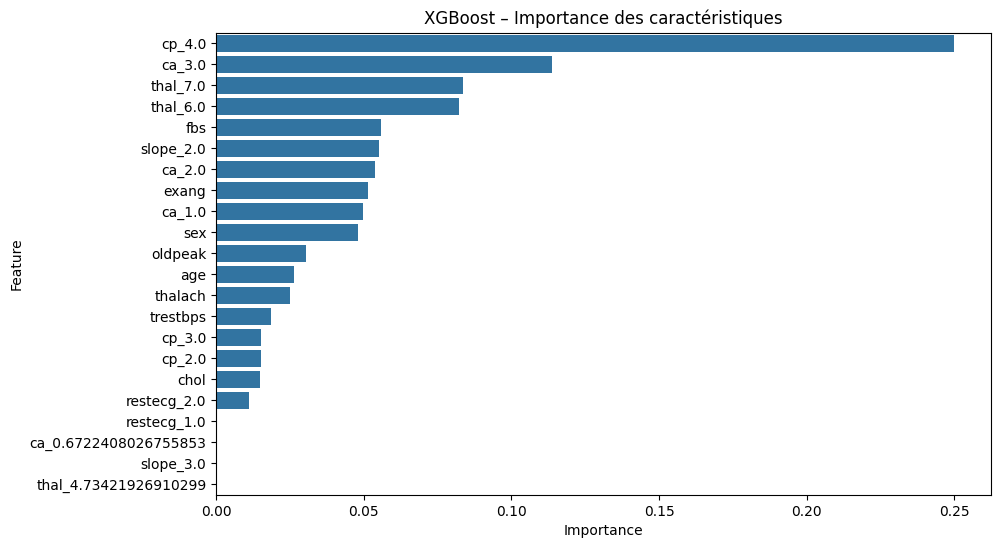

--------------------------------------------------------------------------------
		RFE avec Régression Logistique 
--------------------------------------------------------------------------------
                  Feature  Selected
0                     age     False
1                     sex      True
2                trestbps      True
3                    chol     False
4                     fbs     False
5                 thalach      True
6                   exang     False
7                 oldpeak      True
8                  cp_2.0     False
9                  cp_3.0     False
10                 cp_4.0      True
11            restecg_1.0     False
12            restecg_2.0     False
13              slope_2.0      True
14              slope_3.0     False
15  ca_0.6722408026755853     False
16                 ca_1.0      True
17                 ca_2.0      True
18                 ca_3.0      True
19  thal_4.73421926910299     False
20               thal_6.0     False
21          

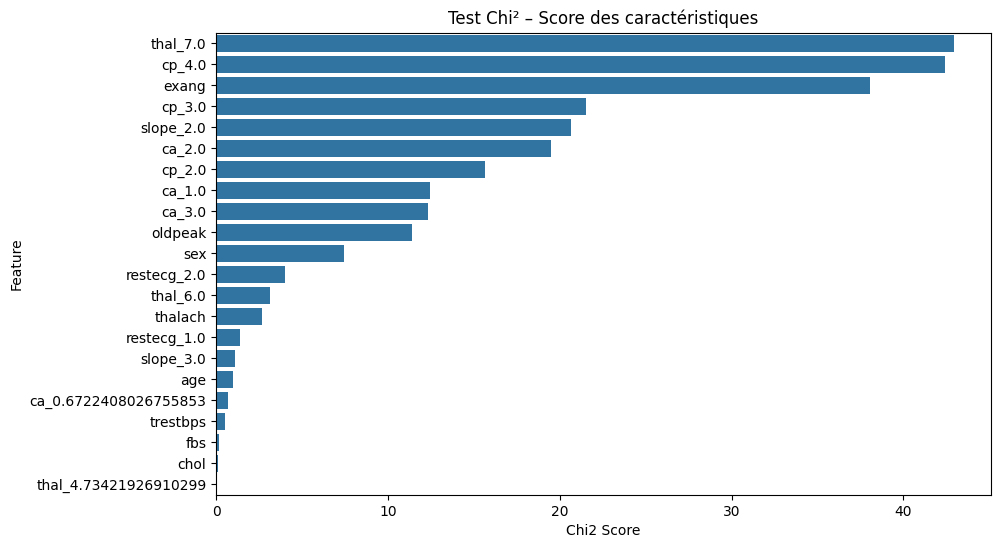

--------------------------------------------------------------------------------
		Final Score 
--------------------------------------------------------------------------------
                  Feature  RF_importance  ...  RFE_selected  Final Score
10                 cp_4.0       0.800578  ...             1     3.787815
21               thal_7.0       0.821928  ...             1     3.156923
7                 oldpeak       0.921011  ...             1     2.307559
5                 thalach       1.000000  ...             1     2.162060
13              slope_2.0       0.321576  ...             1     2.021656
17                 ca_2.0       0.201208  ...             1     1.870547
18                 ca_3.0       0.100492  ...             1     1.842639
16                 ca_1.0       0.283766  ...             1     1.772267
2                trestbps       0.613166  ...             1     1.699928
1                     sex       0.294396  ...             1     1.660109
6                   

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
print("--"*40)
print( "\t\tVerification des Données  " )
print("--"*40)
df = pd.read_csv('heart_clened.csv')
print(df.shape)
print(df.head())

#Séparation X/y & Normalisation
X = df.drop('target', axis=1)
y = df['target']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#Feature Importance -- RandomForest & XGBoost
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X, y)

rf_importances = rf.feature_importances_

rf_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_importances
}).sort_values(by="Importance", ascending=False)
print("--"*40)
print( "\t\tRandom Forest Feature Importance" )
print("--"*40)
print(rf_df)
print("\n" )
print(rf_df.columns)
print("\n")
print(rf_df.head())

print("--"*40)
print( "\t\tVisualisation " )
print("--"*40)

plt.figure(figsize=(10,6))
sns.barplot(data=rf_df, x="Importance", y="Feature")
plt.title("Random Forest – Importance des caractéristiques")
plt.show()
# XGBoost feature Importance - sans erreur
xgb_clf = xgb.XGBClassifier(
    n_estimators=300,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42 )
xgb_clf.fit(X, y)

xgb_importances = xgb_clf.feature_importances_

xgb_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_importances
}).sort_values(by="Importance", ascending=False)
print("\n")
print("--"*40)
print( "\t\tXGBoost Feature Importance" )
print("--"*40)
print(xgb_df)
print("\n")
print(xgb_df.columns)
print("\n")
print(xgb_df.head())
print("\n")
print("--"*40)
print( "\t\tXGBoost Feature Importance Visualisation" )
print("--"*40)
plt.figure(figsize=(10,6))
sns.barplot(data=xgb_df, x="Importance", y="Feature")
plt.title("XGBoost – Importance des caractéristiques")
plt.show()
#RFE Recursive Feature Elimination
log_reg = LogisticRegression(max_iter=500, solver="liblinear")
rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X_scaled, y)
rfe_support = rfe.get_support()
rfe_df = pd.DataFrame({
    "Feature": X.columns,
    "Selected": rfe_support })
print("--"*40)
print( "\t\tRFE avec Régression Logistique " )
print("--"*40)
print(rfe_df)
print("\n")
selected_rfe = X.columns[rfe_support].tolist()
print("--"*40)
print( "\t\tSelected Features " )
print("--"*40)
print(selected_rfe)

# test Chi² - Chi Square
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_scaled, y)
chi2_scores = chi2_selector.scores_
chi2_df = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi2_scores }).sort_values(by="Chi2 Score", ascending=False)
print("\n")
print("--"*40)
print( "\t\tChi2 Score " )
print("--"*40)
print(chi2_df)
print("\n")
print("--"*40)
print( "\t\tVisualisation Chi² " )
print("--"*40)
plt.figure(figsize=(10,6))
sns.barplot(data=chi2_df, x="Chi2 Score", y="Feature")
plt.title("Test Chi² – Score des caractéristiques")
plt.show()

# Selection final des caractéristiques
final_df = pd.DataFrame({
    "Feature": X.columns,
    "RF_importance": rf_importances,
    "XGB_importance": xgb_importances,
    "Chi2": chi2_scores,
    "RFE_selected": rfe_support.astype(int)
})
for col in ["RF_importance", "XGB_importance", "Chi2"]:
    final_df[col] = final_df[col] / final_df[col].max()

final_df["Final Score"] = (
    final_df["RF_importance"] +
    final_df["XGB_importance"] +
    final_df["Chi2"] +
    final_df["RFE_selected"]
)

final_df = final_df.sort_values(by="Final Score", ascending=False)
print("--"*40)
print( "\t\tFinal Score " )
print("--"*40)
print(final_df)
print("\n")

#selection des 10 top feature
top_features = final_df.head(10)["Feature"].tolist()
print("--"*40)
print( "\t\tTop 10 Features " )
print("--"*40)
print(top_features)
print("\n")
print("--"*40)
df_reduced = df[top_features + ["target"]]
df_reduced.to_csv("heart_selected_features.csv", index=False)
print("Fichier exporté : heart_selected_features.csv")